In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# File to Load
most_freq_mutations_metastatic = Path("new_data/most-frequently-mutated-genes-metastatic.json")
most_freq_mutations_primary = Path("new_data/most-frequently-mutated-genes-primary.json")

# Read files and store into Pandas DataFrames
most_freq_metastatic_df= pd.read_json(most_freq_mutations_metastatic)
most_freq_primary_df = pd.read_json(most_freq_mutations_primary)

# Combine the data into a single dataset.  
shared_genes_freq = pd.merge(most_freq_primary_df, most_freq_metastatic_df, how="inner", on=['label'])
shared_genes_freq.columns = ['Gene', 'Primary', 'Metastatic']
shared_genes_freq.head()

,Gene,Primary,Metastatic
0,MUC16,73.063973,74.345550
1,BRAF,53.535354,49.214660
2,LRP1B,45.117845,46.858639
3,FAT4,36.363636,39.790576
4,PTPRT,36.363636,38.219895


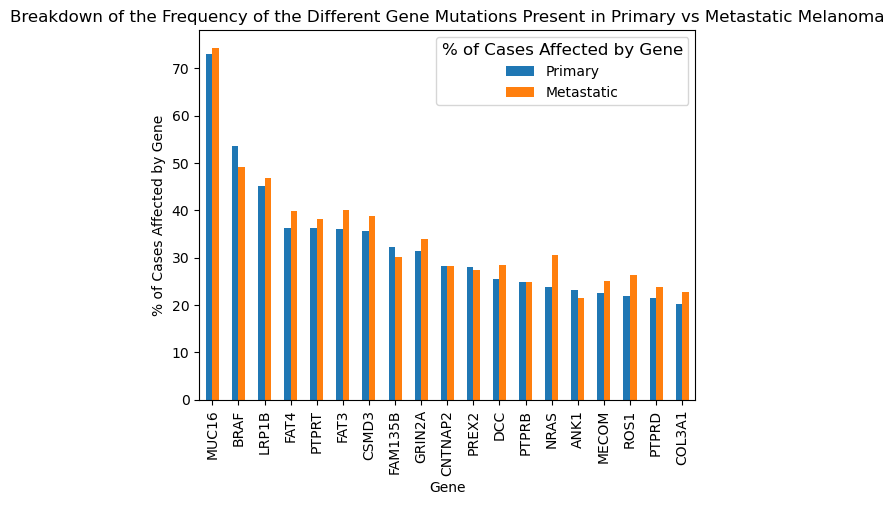

In [2]:
#Make a grouped bar chart that has both
shared_genes_grouped = shared_genes_freq.groupby(['Gene'])
shared_genes_freq.set_index('Gene', inplace=True)
shared_genes_freq.plot(kind='bar',rot=0)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected by Gene')
plt.title('Breakdown of the Frequency of the Different Gene Mutations Present in Primary vs Metastatic Melanoma')
plt.legend(title='% of Cases Affected by Gene', title_fontsize='large')
plt.xticks(rotation='vertical')
    
plt.show()